# Base Data
The "base" data is what I am calling NOAA CSL inventory data, downloaded from https://csl.noaa.gov/groups/csl7/measurements/2020covid-aqs/emissions/. These are the files downloaded and organized by "data_download.py". 

In [19]:
#Import packages
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import noaa_csl_funcs as ncf

For loading point emissions:

In [20]:
base_path = '/uufs/chpc.utah.edu/common/home/lin-group9/agm/NOAA_CSL_Data/base' #where the data downloaded using data_download.py lives
bau_or_covid = 'COVID'
BCH = ncf.Base_CSL_Handler(base_path,bau_or_covid)
year = 2019
month = 1
sector = 'point_EGU' 
day_type = 'satdy'

base_ds = BCH.load_fullday_nc(sector,year,month,day_type)
base_ds

<xarray.Dataset>
Dimensions:   (ROW: 191836, utc_hour: 24)
Coordinates:
    XLONG     (ROW) float32 -87.5 -91.68 -75.01 -88.27 ... -108.1 -108.1 -77.7
    XLAT      (ROW) float32 37.65 41.92 40.82 41.89 ... 39.4 39.4 39.4 37.66
  * utc_hour  (utc_hour) int64 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22 23
Dimensions without coordinates: ROW
Data variables: (12/87)
    ITYPE     (ROW) float32 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0 1.0
    STKht     (ROW) float32 76.2 125.6 76.2 19.81 ... 6.096 4.572 1.524 9.144
    STKdiam   (ROW) float32 3.658 3.661 1.219 1.015 ... 0.61 0.152 0.201 nan
    STKtemp   (ROW) float32 433.1 427.6 754.3 533.2 ... 644.3 810.9 724.8 nan
    STKve     (ROW) float32 8.992 20.99 13.62 9.737 ... 3.048 0.03 6.706 nan
    STKflw    (ROW) float32 94.56 220.9 nan 7.881 7.968 ... nan 0.0006 nan nan
    ...        ...
    PM14      (utc_hour, ROW) float32 dask.array<chunksize=(12, 191836), meta=np.ndarray>
    PM15      (utc_hour, ROW) float32 dask.array<chunksize=(12, 191836), meta=np.ndarray>
    PM16      (utc_hour, ROW) float32 dask.array<chunksize=(12, 191836), meta=np.ndarray>
    PM17      (utc_hour, ROW) float32 dask.array<chunksize=(12, 191836), meta=np.ndarray>
    PM18      (utc_hour, ROW) float32 dask.array<chunksize=(12, 191836), meta=np.ndarray>
    PM19      (utc_hour, ROW) float32 dask.array<chunksize=(12, 191836), meta=np.ndarray>
Attributes:
    grid_type:  point
    sector_id:  EGU
    year:       2019
    month:      1
    day_type:   satdy
    nc_fpath:   /uufs/chpc.utah.edu/common/home/lin-group9/agm/NOAA_CSL_Data/...

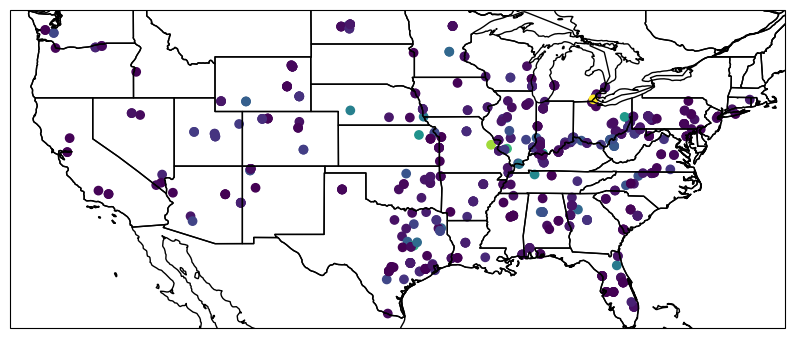

In [18]:
# View the point dataset
df = base_ds['CO2'][1].to_dataframe() #for viz, use CO2 at hour 1 
sub_df = df.loc[df['CO2']>100] #and subset to bigger sources
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = proj)
ax.scatter(sub_df['XLONG'],sub_df['XLAT'],c=sub_df['CO2'])
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
plt.show()

For loading area emissions:

In [22]:
base_path = '/uufs/chpc.utah.edu/common/home/lin-group9/agm/NOAA_CSL_Data/base' #where the data downloaded using data_download.py lives
bau_or_covid = 'COVID'
BCH = ncf.Base_CSL_Handler(base_path,bau_or_covid)
year = 2019
month = 1
sector = 'area_OG' 
day_type = 'satdy'

base_ds = BCH.load_fullday_nc(sector,year,month,day_type)
base_ds

<xarray.Dataset>
Dimensions:   (utc_hour: 24, south_north: 1008, west_east: 1332)
Coordinates:
    XLAT      (south_north, west_east) float32 18.19 18.2 18.21 ... 52.42 52.41
    XLONG     (south_north, west_east) float32 -121.8 -121.7 ... -58.63 -58.58
  * utc_hour  (utc_hour) int64 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22 23
Dimensions without coordinates: south_north, west_east
Data variables: (12/80)
    CO        (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    CO2       (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    HC01      (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    HC02      (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    HC03      (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    HC04      (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    ...        ...
    PM17      (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    PM18      (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    PM19      (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    PM25-PRI  (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    SO2       (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
    VOC       (utc_hour, south_north, west_east) float32 dask.array<chunksize=(12, 1008, 1332), meta=np.ndarray>
Attributes: (12/35)
    WEST-EAST_GRID_DIMENSION:        1333
    SOUTH-NORTH_GRID_DIMENSION:      1009
    DX:                              4000.0
    DY:                              4000.0
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      1332
    ...                              ...
    grid_type:                       area
    sector_id:                       OG
    year:                            2019
    month:                           1
    day_type:                        satdy
    nc_fpath:                        /uufs/chpc.utah.edu/common/home/lin-grou...